In [29]:
import pandas as pd
from datasets import Dataset
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# load data
train = Dataset.load_from_disk("data/train")
val = Dataset.load_from_disk("data/val")
dev = Dataset.load_from_disk("data/dev")

In [4]:
data = {}
data['train'] = pd.DataFrame(train)
data['val'] = pd.DataFrame(val)
data['dev'] = pd.DataFrame(dev)


In [5]:
# determine the size of dataset
temp = pd.concat([df for df in data.values()])
print(len(temp.par_id.unique())) # total size
len(temp.par_id.unique()[temp.label == 1]) # total number of PCL paragraphs

10468


993

In [6]:
# check the test data size
test_data = pd.read_csv("data/task4_test.tsv", sep='\t', header=None)
len(test_data[0].unique())

3832

## Remove extra prefix in *art_id* column

In [7]:
for df in data.values():
    np.all(df.art_id.apply(lambda x: True if x[:2] == "@@" else False)) # check that all art_id has same prefix '@@'
    df['art_id'] = df.art_id.apply(lambda x: x[2:]).astype('int64') # perform removal of prefix
    df['art_id'] = df['art_id'].astype('int64') # convert to integer type

# Exploratory Data Analysis (on training data)

In [8]:
train_val_df = pd.concat([data['train'], data['val']])
train_val_df

,par_id,art_id,keyword,country_code,text,label_score,label,label_category_vector,input_ids,attention_mask
0,99,25281193,in-need,my,The departures from London will barely put a d...,0,0,"[0, 0, 0, 0, 0, 0, 0]","[101, 1996, 6712, 2015, 2013, 2414, 2097, 4510...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,3162,20664287,migrant,nz,""" Singh is the most common surname for our dri...",0,0,"[0, 0, 0, 0, 0, 0, 0]","[101, 1000, 5960, 2003, 1996, 2087, 2691, 1198...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,246,20000497,homeless,au,What causes someone to become homeless ? Brain...,1,0,"[0, 0, 0, 0, 0, 0, 0]","[101, 2054, 5320, 2619, 2000, 2468, 11573, 102...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,7613,15679266,vulnerable,za,- An extended-hour 's clinic pilot project was...,0,0,"[0, 0, 0, 0, 0, 0, 0]","[101, 1011, 2019, 3668, 1011, 3178, 1005, 1055...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,98,15438640,immigrant,pk,The Golden State is home to the country 's lar...,0,0,"[0, 0, 0, 0, 0, 0, 0]","[101, 1996, 3585, 2110, 2003, 2188, 2000, 1996...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...
1670,1029,16905169,homeless,za,Muizenberg residents have lambasted the Muizen...,0,0,"[0, 0, 0, 0, 0, 0, 0]","[101, 14163, 4697, 11144, 3901, 2031, 12559, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1671,2767,23925,disabled,in,Christian missionaries care for the destitute ...,4,1,"[1, 1, 0, 0, 0, 0, 0]","[101, 3017, 11743, 2729, 2005, 1996, 4078, 377...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1672,5532,10345914,women,gh,I bid you fraternal greetings Hon. Alex Bapula...,0,0,"[0, 0, 0, 0, 0, 0, 0]","[101, 1045, 7226, 2017, 25312, 16451, 2389, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1673,3641,70027514,hopeless,jm,""" He had one good Ashes series and what he del...",0,0,"[0, 0, 0, 0, 0, 0, 0]","[101, 1000, 2002, 2018, 2028, 2204, 11289, 218...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [9]:
train_val_df['label'][train_val_df['art_id'].map(train_val_df['art_id'].value_counts()) > 1]

12      0
99      0
117     1
118     0
129     0
       ..
1579    0
1587    0
1610    0
1650    0
1653    0
Name: label, Length: 475, dtype: int64

## Analysis of class labels

In [20]:
# create helper function to determine correlation between features and label
def cramer_V(freq_table):
    x2 = chi2_contingency(freq_table, correction=False)[0]
    return np.sqrt((x2 / freq_table.values.sum()) / (min(freq_table.shape) - 1))


### By length of text 

In [25]:
# determine the point biserial correlation coefficient between length of text and prediction
text_len = train_val_df['text'].apply(len)
pointbiserialr(train_val_df.label, text_len)

SignificanceResult(statistic=0.03701849535853825, pvalue=0.0007030057772265076)

### By number of tokens

In [46]:
# determine the point biserial correlation coefficient between length of text and prediction
vectorizer = CountVectorizer()
train_val_tokens = vectorizer.fit_transform(train_val_df.text.values)
num_tokens = np.sum(train_val_tokens.todense(), axis=1).flat
pointbiserialr(train_val_df.label, num_tokens)

SignificanceResult(statistic=0.04939425266677241, pvalue=6.114179022448945e-06)

### By repetition of tokens / maximum occurence of token

In [47]:
# determine the point biserial correlation coefficient between maximum occurence of token and prediction
vectorizer = CountVectorizer()
train_val_tokens = vectorizer.fit_transform(train_val_df.text.values)
num_tokens = np.max(train_val_tokens.todense(), axis=1).flat
pointbiserialr(train_val_df.label, num_tokens)

SignificanceResult(statistic=0.04923775027429294, pvalue=6.542441400616269e-06)

### By Country

In [16]:
# examine the number of PCL by country
print(train_val_df[train_val_df['label'] == 1].country_code.value_counts())
print(train_val_df[train_val_df['label'] != 1].country_code.value_counts())

country_code
gh    100
ng     94
ph     92
za     80
ie     74
jm     74
gb     74
ca     62
pk     62
my     60
lk     58
bd     58
nz     54
sg     54
us     54
ke     52
in     48
au     48
tz     44
hk     26
Name: count, dtype: int64
country_code
sg    656
au    650
pk    644
us    640
ke    630
in    626
my    624
za    618
ph    618
lk    616
ca    616
hk    616
nz    614
gh    612
bd    598
ng    592
ie    586
gb    554
jm    544
tz    478
Name: count, dtype: int64


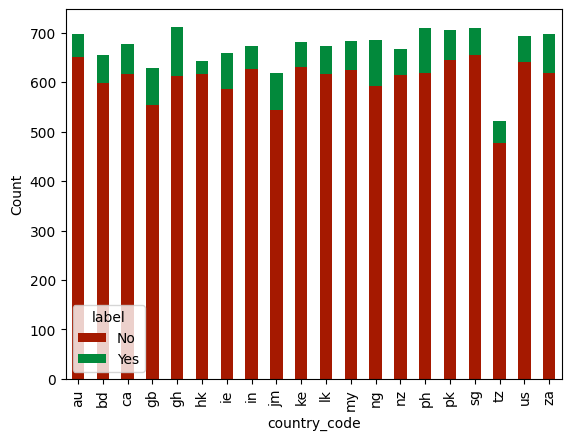

In [14]:
# plot frequency plot
train_val_df.groupby(['country_code', 'label']).size().unstack().plot(
    kind='bar', stacked=True, color=['#a51900', '#02893b'], xlabel="country_code", ylabel="Count"
)
plt.legend(['No', 'Yes'], title="label")
plt.show()

In [21]:
# determine the correlation between country and label using Cramer's V
cramer_V(pd.crosstab(train_val_df['country_code'], train_val_df['label']))

0.07618400627076896

### By Keyword

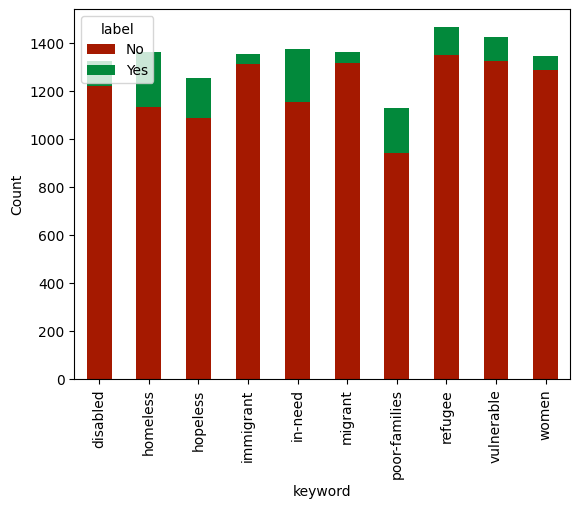

In [19]:
train_val_df.groupby(['keyword', 'label']).size().unstack().plot(
    kind='bar', stacked=True, color=['#a51900', '#02893b'], xlabel="keyword", ylabel="Count"
)
plt.legend(['No', 'Yes'], title="label")
plt.show()

In [22]:
# determine the correlation between keyword and label using Cramer's V
cramer_V(pd.crosstab(train_val_df['keyword'], train_val_df['label']))

0.1786041630371666

### By article ID

In [27]:
# determine the correlation between keyword and label using Cramer's V
cramer_V(pd.crosstab(train_val_df['art_id'], train_val_df['label']))

0.989978409493731